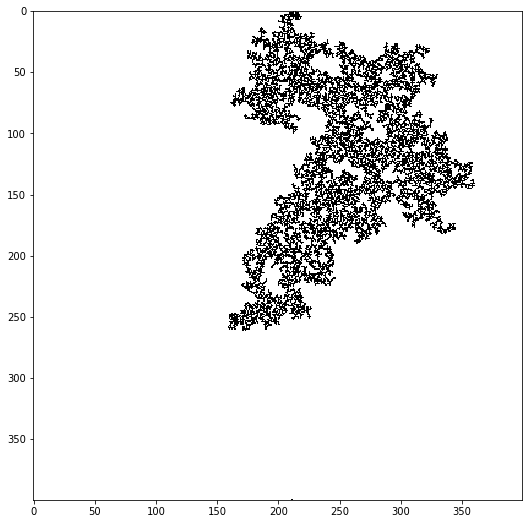

In [3]:
import random as rand
import numpy as np
import pylab as plb
plb.rcParams['figure.figsize'] =9,9


SIZE = 400
TestRooms = np.zeros((SIZE,SIZE),'int8')
TestRooms[SIZE//2 , SIZE//2] = 10
p=0.59
a , b = SIZE//2 , SIZE//2

def find_neigh(Rooms,i,j):
    s=""
    if i >= Rooms.shape[0]-1 or j >= Rooms.shape[0]-1:
        return ""
    if not Rooms[i-1,j]:
        s+="u"
    if not Rooms[i,j+1]:
        s+="r"
    if not Rooms[i+1,j]:
        s+="d"
    if not Rooms[i,j-1]:
        s+="l"
    return s

def AnY(Test):
    Where = np.argwhere(Test >0)
    for P in Where:
        i,j=P[0],P[1]
        if  1<i<Test.shape[0]-2:
            return False
        elif 1<j<Test.shape[0]-2:
            return False
        elif not(Test[i+1][j] and Test[i][j+1] and Test[i-1][j] and Test[i][j-1]):
            return False
    return True

def GyrRad (Test,N):
    Wh = np.argwhere(TestRooms>0)
    Sum = 0
    a , b = SIZE//2 , SIZE//2
    for P in Wh:
        i,j = P[0],P[1]
        
        x , y = i-a , j-b
        Sum += x**2 + y**2
    return np.sqrt(Sum/N)


Ss =[]
Gys=[]

for X in range(1):

    TestRooms = np.zeros((SIZE,SIZE),'int8')
    TestRooms[SIZE//2 , SIZE//2] = 1
    
    for _ in range(450):
        
        if AnY(TestRooms):
            print('MAk')
            break
            
        Wh = np.argwhere(TestRooms==10)
        
        for P in Wh:
            TestRooms[P[0],P[1]] = 1
        Wh = np.argwhere(TestRooms==1)
        for PTS in Wh:
            i,j= PTS[0],PTS[1]
            valroom = find_neigh(TestRooms,i,j)
            if len(valroom) == 0:
                continue

            prob = rand.random()
            if "u" in valroom :
                if p>prob:
                    TestRooms[i-1,j] = 10
                else:
                    TestRooms[i-1,j] = -1

            prob = rand.random()
            if "r" in valroom:
                if p>prob:
                    TestRooms[i,j+1] = 10
                else:
                    TestRooms[i,j+1] = -1

            prob = rand.random()
            if "d" in valroom:
                if p>prob:
                    TestRooms[i+1,j] = 10
                else:
                    TestRooms[i+1,j] = -1

            prob = rand.random()
            if "l" in valroom:
                if p>prob:
                    TestRooms[i,j-1] = 10
                else:
                    TestRooms[i,j-1] = -1 
                    
    TestRooms[TestRooms == -1] = 0
    Ss.append(np.count_nonzero(TestRooms))
    Gys.append(GyrRad(TestRooms,Ss[-1]-1))
 
 #Getting a list of Gyr rad and Areas
"""print(Ss,Gys)
print(np.mean(Ss))
print(np.nanmean(Gys))"""



TestRooms[TestRooms <0] = 0
TestRooms[TestRooms > 0] = 1

plb.imshow(TestRooms,cmap="binary")
